# NBA API and Linear Regression

### Finding the most efficient, least efficient, most underutiized and overutilized scorers in the NBA

## NBA Scoring Regression

**1.** First - I used code from [BetterProgramming](https://betterprogramming.pub/using-pythons-nba-api-to-create-a-simple-regression-model-ac9a3b36bc8) as a guide to understanding the basics of the NBA API as well as linear regression.

> All code in the below block comes from the link provided above.

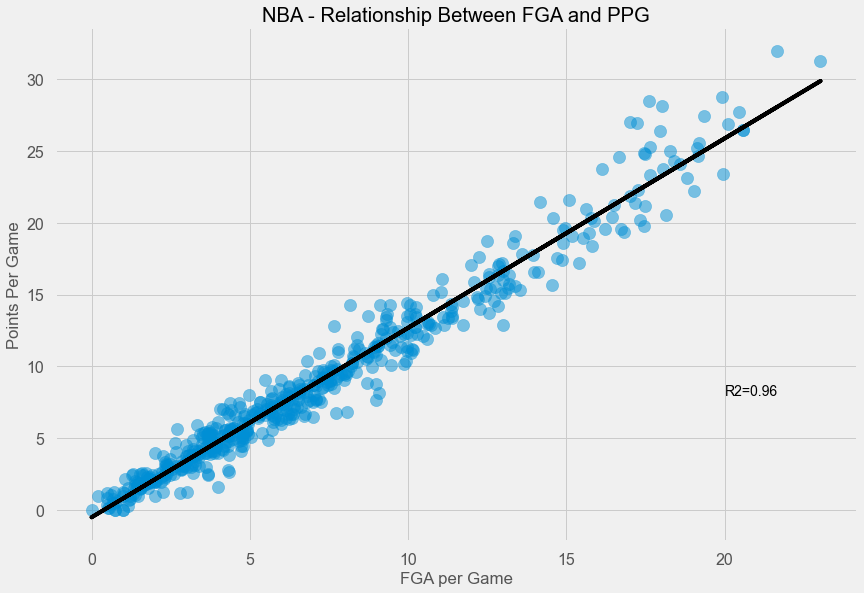

<Figure size 720x576 with 0 Axes>

In [94]:
# First we will import our packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Here we access the leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Our "data" variable now has built in functions such as creating a dataframe for our data
df = data.league_leaders.get_data_frame()

# First we need to get per game stats.
# We divide each variable by games played (GP) to get per game average
x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     

""" Build and fit linea regression model """
# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=150, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,8, f'R2={r2}')                                   # 10, 25 are the coordinates for our text. Adjust accordingly
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
print('')

> To further explain the graph above, it simply shows the correlation between number of shots taken (x-axis) and points scored per game (y-axis).  As we could guess, the more shots a player takes, the more points they generally will score.

---

## NBA Most Effecient Scorers

**2.** Below, I searched for and graphed the **5 MOST efficient scorers in the NBA**.  Efficiency in this case was determined by how much a certain player came above our line of regression.  To be above our line of regression, a player's **Points scored per game had to be higher than their expected points scored per game** -- aka, efficiency!

> In the block of code below, I calculate a "score" for each player.  The score is simply how much a player outscores (or doesn't outscore) their expected points per game by.

> As I mentioned above, I calculated this score by subtracting a players expected points per game (based on shot attempts) by their actual points scored per game.

In [20]:
import heapq
import random

# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were BEST outperforming our line of regression

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 largest PPG - ExPPG in the NBA (most efficient players) and storing
# Them to player_index
player_index = heapq.nlargest(11, range(len(score)), score.take)

# A new list to store information from the original DataFrame
most_efficient = []

# Using our original DataFrame, appending all player information for my 10 most efficient players to my
# 'most_efficient' list
for i in range(len(player_index)):
    most_efficient.append(df.loc[player_index[i]])

# Creating a new DataFrame called 'most_efficient_DF' from my 'most_efficient' list
most_efficient_DF = pd.DataFrame(most_efficient)

# Creating a filter for at least 500 shot attempts
most_efficient_DF = most_efficient_DF[most_efficient_DF['FGA'] > 500]

# Resetting player_index list so that it only contains those with at least 500 shot attempts
player_index = most_efficient_DF.index

> Below, I use the original chunk of code from [BetterProgramming](https://betterprogramming.pub/using-pythons-nba-api-to-create-a-simple-regression-model-ac9a3b36bc8) again, but I use plt.annotate call in order to draw lines from a certain player's bubble to their name, so that we can see where our five most efficient players land.

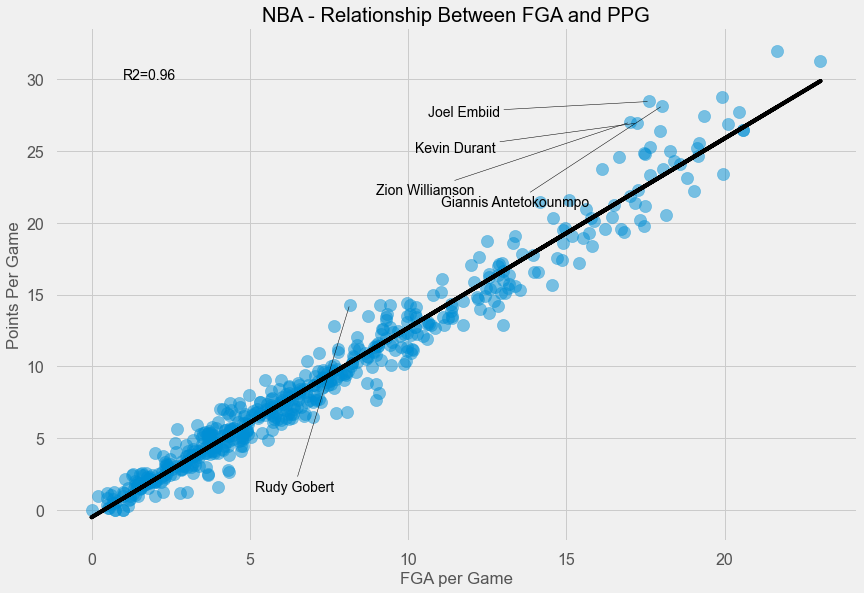

<Figure size 720x576 with 0 Axes>

In [93]:
'''
ORIGINAL CODE FROM WEBSITE
---------------------------------------------------------------------------------------------
'''

x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     


# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=150, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(1,30, f'R2={r2}')                                   # 10, 25 are the coordinates for our text. Adjust accordingly

'''
---------------------------------------------------------------------------------------------
MY CODE BELOW
'''

# In order to point out my 10 most efficient players on the graph, I used plt.annotate and plugged in the
# indexes from 'player_index' list with lines drawn to their dots
for i in range(len(player_index) - 5):
    plt.annotate(most_efficient_DF.PLAYER[player_index[i]], 
                 (x[player_index[i]], y[player_index[i]]), 
                 (x[player_index[i]]-random.randint(0,11), y[player_index[i]]-random.randint(0,14)),
                 arrowprops=dict(arrowstyle='-', color = 'black'))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
print(' ')

> I only include the names of the top 5 scorers on the graph for clarity purposes, but have the top 10 in the DataFrame printed below to view.

> Below is a printed DataFrame of the ten most efficient scorers in the NBA, and **on the far right you can see by exactly how much they outscore their expected points per game**.

In [32]:
most_efficient_DF['PPG - ExPPG'] = score[player_index]
most_efficient_DF.loc[:,'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG - ExPPG
15,Joel Embiid,PHI,51,1585,461,899,0.513,58,154,0.377,471,548,0.859,113,426,539,145,50,69,159,123,1451,1580,0.91,0.31,5.707362
9,Zion Williamson,NOP,61,2026,634,1037,0.611,10,34,0.294,369,529,0.698,167,274,441,226,57,39,167,135,1647,1680,1.35,0.34,5.083943
5,Giannis Antetokounmpo,MIL,61,2013,626,1100,0.569,67,221,0.303,398,581,0.685,97,574,671,357,72,73,207,168,1717,2026,1.73,0.35,4.869315
63,Kevin Durant,BKN,35,1157,324,603,0.537,85,189,0.450,210,238,0.882,13,234,247,195,25,45,120,70,943,1028,1.63,0.21,4.725331
56,Rudy Gobert,UTA,71,2187,391,579,0.675,0,4,0.000,233,374,0.623,240,720,960,89,40,190,118,163,1015,1847,0.75,0.34,4.045703
0,Stephen Curry,GSW,63,2152,658,1365,0.482,337,801,0.421,362,395,0.916,29,316,345,363,77,8,213,119,2015,1855,1.70,0.36,3.913086
46,Jimmy Butler,MIA,52,1745,366,736,0.497,25,102,0.245,359,416,0.863,94,265,359,369,108,18,109,71,1116,1434,3.39,0.99,3.299345
2,Nikola Jokic,DEN,72,2488,732,1293,0.566,92,237,0.388,342,394,0.868,205,575,780,599,95,48,222,192,1898,2585,2.70,0.43,3.181084
49,James Harden,BKN,44,1609,342,734,0.466,121,334,0.362,278,323,0.861,35,313,348,475,53,33,177,99,1083,1378,2.68,0.30,3.117237
1,Damian Lillard,POR,67,2398,602,1334,0.451,275,704,0.391,449,484,0.928,32,251,283,505,62,17,203,102,1928,1825,2.49,0.31,3.021400


## NBA Least Efficient Scorers

**3.** Below, I searched for and graphed the **5 LEAST efficient scorers in the NBA**.  Efficiency in this case was determined by how much a certain player came below our line of regression.  To underperform with our line of regression, a player's **points scored per game had to be lower than their expected points scored per game** -- aka, not very efficienct!

> In the block of code below, I calculate a "score" for each player.  The score is simply how much a player outscores (or doesn't outscore) their expected points per game.

In [95]:
# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were least outperforming our line of regression while taking 500 shots

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 smallest PPG - ExPPG in the NBA (least efficient players) and storing
# Them to player_index
player_index2 = heapq.nsmallest(20, range(len(score)), score.take)

# A new list to store information from the original DataFrame
least_efficient = []

# Using our original DataFrame, appending all player information for my 10 least efficient players to my
# 'least_efficient' list
for i in range(len(player_index2)):
    least_efficient.append(df.loc[player_index2[i]])

# Creating a new DataFrame called 'least_efficient_DF' from my 'least_effecient' list
least_efficient_DF = pd.DataFrame(least_efficient)

# Creating a filter for at least 500 shot attempts
least_efficient_DF = least_efficient_DF[least_efficient_DF['FGA'] > 500]

# Resetting player_index2 list so that it only contains those with at least 500 shot attempts
player_index2 = least_efficient_DF.index

> Below, I use the original chunk of code from [BetterProgramming](https://betterprogramming.pub/using-pythons-nba-api-to-create-a-simple-regression-model-ac9a3b36bc8) again, but I use plt.annotate call in order to draw lines from a certain player's bubble to their name, so that we can see where our five least efficient players land.

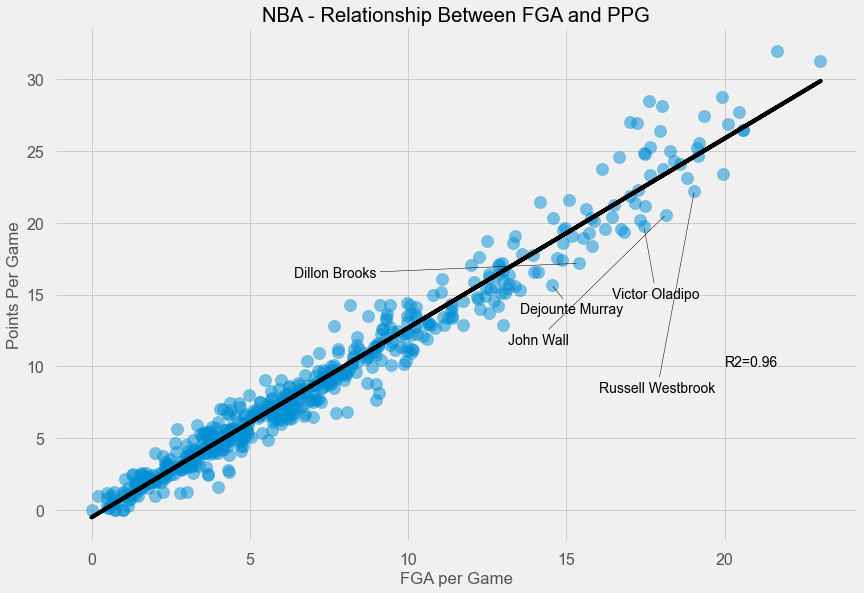

<Figure size 720x576 with 0 Axes>

In [123]:
'''
ORIGINAL CODE FROM WEBSITE
---------------------------------------------------------------------------------------------
'''

x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     


# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=150, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,10, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly


'''
---------------------------------------------------------------------------------------------
MY CODE BELOW
'''

# In order to point out my 10 least efficient players on the graph, I used plt.annotate and plugged in the
# indexes from 'player_index2' list with lines drawn to their dots
for i in range(len(player_index2) - 4):
    plt.annotate(least_efficient_DF.PLAYER[player_index2[i]], 
                 (x[player_index2[i]], y[player_index2[i]]), 
                 (x[player_index2[i]]-random.randint(0,10), y[player_index2[i]]-random.randint(0,14)),
                 arrowprops=dict(arrowstyle='-', color = 'black'))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
print(' ')

> Below is a printed out DataFrame of the ten least efficient scorers in the NBA (with at least 500 shot attempts), and **on the far right you can see exactly how much they fall short of their expected points per game**.

In [124]:
least_efficient_DF['ExPPG - PPG'] = score[player_index2]
least_efficient_DF.loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,ExPPG - PPG
51,Dejounte Murray,SAS,67,2139,441,974,0.453,63,199,0.317,106,134,0.791,58,415,473,363,101,7,117,135,1051,1317,3.10,0.86,-2.981391
91,John Wall,HOU,40,1288,293,726,0.404,79,249,0.317,158,211,0.749,17,112,129,275,42,31,141,46,823,673,1.95,0.30,-2.857821
145,Victor Oladipo,MIA,33,1080,235,576,0.408,78,239,0.326,104,138,0.754,12,148,160,151,46,14,83,81,652,565,1.82,0.55,-2.757993
43,Dillon Brooks,MEM,67,1997,432,1031,0.419,128,372,0.344,159,195,0.815,53,143,196,157,78,26,119,237,1151,854,1.32,0.66,-2.610924
18,Russell Westbrook,WAS,65,2369,544,1238,0.439,86,273,0.315,271,413,0.656,109,641,750,763,89,23,312,190,1445,1922,2.45,0.29,-2.384012
10,Nikola Vucevic,CHI,70,2348,666,1396,0.477,176,440,0.400,131,156,0.840,146,671,817,269,65,48,126,137,1639,1957,2.14,0.52,-2.383180
150,Elfrid Payton,NYK,63,1484,269,622,0.432,28,98,0.286,73,107,0.682,64,152,216,203,47,9,103,116,639,624,1.97,0.46,-2.373242
22,Anthony Edwards,MIN,72,2314,505,1211,0.417,171,520,0.329,211,272,0.776,59,277,336,211,82,36,160,129,1392,1130,1.32,0.51,-2.344584
114,Darius Bazley,OKC,55,1714,273,690,0.396,83,286,0.290,125,178,0.702,51,345,396,99,29,25,122,60,754,711,0.81,0.24,-2.331754


## NBA Underutilized and Overutilized Scorers

**4.** Lastly, I wanted to include a section on the most underutilized players and most overutilized players in the NBA - based on how they performed against the line of regression.

> The average NBA player only takes about 7 shots per game.  However, the **average shots per game for the top 100 scorers in the NBA is about 14**, so that is the number we will use to compare.

In [51]:
x = df.nlargest(100, ['PTS'])
print(round(x['Shots per Game'].mean(), 2), 'average shots per game for the top 100 scorers in the NBA.')

14.51 average shots per game for the top 100 scorers in the NBA.


In [50]:
df['Score'] =  score
df['Shots per Game'] = x
var1 = df['Score'] > 2
var2 = df['Shots per Game'] <= 14
var3 = df['FGA'] >= 500
df[var1 & var2 & var3].loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,Score,Shots per Game
37,Bam Adebayo,MIA,64,2143,456,800,0.570,2,8,0.250,283,354,0.799,142,431,573,346,75,66,169,145,1197,1673,2.05,0.44,2.722231,12.50000
56,Rudy Gobert,UTA,71,2187,391,579,0.675,0,4,0.000,233,374,0.623,240,720,960,89,40,190,118,163,1015,1847,0.75,0.34,4.045703,8.15493
68,Montrezl Harrell,LAL,69,1580,375,603,0.622,0,10,0.000,181,256,0.707,158,270,428,73,46,49,74,128,931,1150,0.99,0.62,2.472165,8.73913
75,Richaun Holmes,SAC,61,1781,366,575,0.637,2,11,0.182,135,170,0.794,144,360,504,101,39,96,75,213,869,1290,1.35,0.52,2.319081,9.42623


> The players above all score at least two points ABOVE their expected points total while taking less shots per game than the average of the top 100 scorers in the league.  **These players should be shooting more often.**
(*Scroll all the way to the right*)

In [52]:
var1 = df['Score'] <= (-2)
var2 = df['Shots per Game'] >= 14
var3 = df['FGA'] >= 500
df[var1 & var2].loc[:, 'PLAYER':]

,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,Score,Shots per Game
10,Nikola Vucevic,CHI,70,2348,666,1396,0.477,176,440,0.400,131,156,0.840,146,671,817,269,65,48,126,137,1639,1957,2.14,0.52,-2.383180,19.942857
18,Russell Westbrook,WAS,65,2369,544,1238,0.439,86,273,0.315,271,413,0.656,109,641,750,763,89,23,312,190,1445,1922,2.45,0.29,-2.384012,19.046154
22,Anthony Edwards,MIN,72,2314,505,1211,0.417,171,520,0.329,211,272,0.776,59,277,336,211,82,36,160,129,1392,1130,1.32,0.51,-2.344584,16.819444
43,Dillon Brooks,MEM,67,1997,432,1031,0.419,128,372,0.344,159,195,0.815,53,143,196,157,78,26,119,237,1151,854,1.32,0.66,-2.610924,15.388060
51,Dejounte Murray,SAS,67,2139,441,974,0.453,63,199,0.317,106,134,0.791,58,415,473,363,101,7,117,135,1051,1317,3.10,0.86,-2.981391,14.537313
61,Caris LeVert,IND,47,1485,359,814,0.441,84,258,0.326,146,180,0.811,33,181,214,245,66,30,102,105,948,912,2.40,0.65,-2.166778,17.319149
91,John Wall,HOU,40,1288,293,726,0.404,79,249,0.317,158,211,0.749,17,112,129,275,42,31,141,46,823,673,1.95,0.30,-2.857821,18.150000
145,Victor Oladipo,MIA,33,1080,235,576,0.408,78,239,0.326,104,138,0.754,12,148,160,151,46,14,83,81,652,565,1.82,0.55,-2.757993,17.454545


> The players above all score at least two points BELOW their expected points total while taking more shots per game than the average of the top 100 scorers in the league.  **These players should be shooting less often.**
(*Scroll all the way to the right*)

---

## Summary

> While these numbers do a tell a part of the story, it is only that.  Players like Jordan Clarkson and Dillon Brooks are vital to their teams success because of their ability to create and make shots.  What makes a basketball player useful to his or her team will always go beyond the base stats, so while it is useful and necessary to extract data like this, it is just as important to be able to understand the game and to use these two understandings in conjunction.

## Thank you for reading!

*Michael Black*